In [297]:
import pandas as pd
import quandl
import math
import datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [292]:
style.use('ggplot')

In [262]:
df = quandl.get('WIKI/GOOGL')

In [263]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [264]:
list(df.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [265]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [266]:
#High-low Percent 
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
#Percent change
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 

In [267]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume' ]]

In [268]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [269]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [270]:
forecast_out = int(math.ceil(0.01*len(df)))

In [271]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [272]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [273]:
# features = X
#labels = y
X = np.array(df.drop(['label'], 1))

/tmp/ipykernel_11814/2963233242.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['label'], 1))


In [274]:
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [275]:
df.dropna(inplace=True)
y = np.array(df['label'])
#y = np.array(df['label'])

In [276]:
len(X)

3389

In [277]:
len(y)

3389

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [279]:
clf = LinearRegression(n_jobs=-1)
#clf = svm.SVR()

In [280]:
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [298]:
with open('linearregression.pickle','wb')as f:
    pickle.dump(clf,f)
    
pickle_in = open('linearregression.pickle','rb')

In [299]:
clf = pickle.load(pickle_in)

In [300]:
accuracy = clf.score(X_test, y_test)

In [301]:
print(forecast_out)
#print(accuracy)

35


In [302]:
forecast_set = clf.predict(X_lately)

In [303]:
print('FORECAST SET \n',forecast_set)
print('---------------------------------------------------------------')
print('ACCURACY ',accuracy)
print('---------------------------------------------------------------')
print('FORECAST OUT ',forecast_out)

FORECAST SET 
 [1076.09293919 1090.69771751 1104.59751128 1099.13221707 1092.64889702
 1090.0333506  1088.41107107 1085.36015233 1079.24371296 1074.89686564
 1072.56283243 1092.32837169 1110.71142618 1115.00231341 1129.91489412
 1133.90066238 1132.44720003 1130.01187377 1131.75802329 1150.38590582
 1149.46655026 1159.33782426 1155.91409724 1163.72440339 1184.2356769
 1196.42087969 1190.70392492 1202.60008753 1208.10196458 1206.33448261
 1197.10183726 1202.53923569 1201.3190427  1136.95278729 1084.16430887]
---------------------------------------------------------------
ACCURACY  0.9786884533323661
---------------------------------------------------------------
FORECAST OUT  35


In [304]:
df['Forecast'] = np.nan

In [305]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [306]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

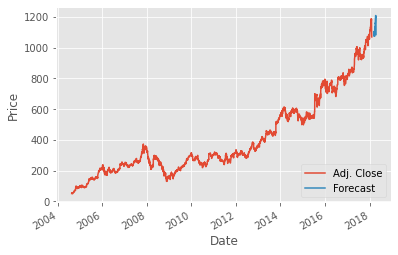

In [307]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()